In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/cs573"

/content/drive/MyDrive/cs573


In [4]:
%pwd

'/content/drive/MyDrive/cs573'

# Accuracy by Chart Type

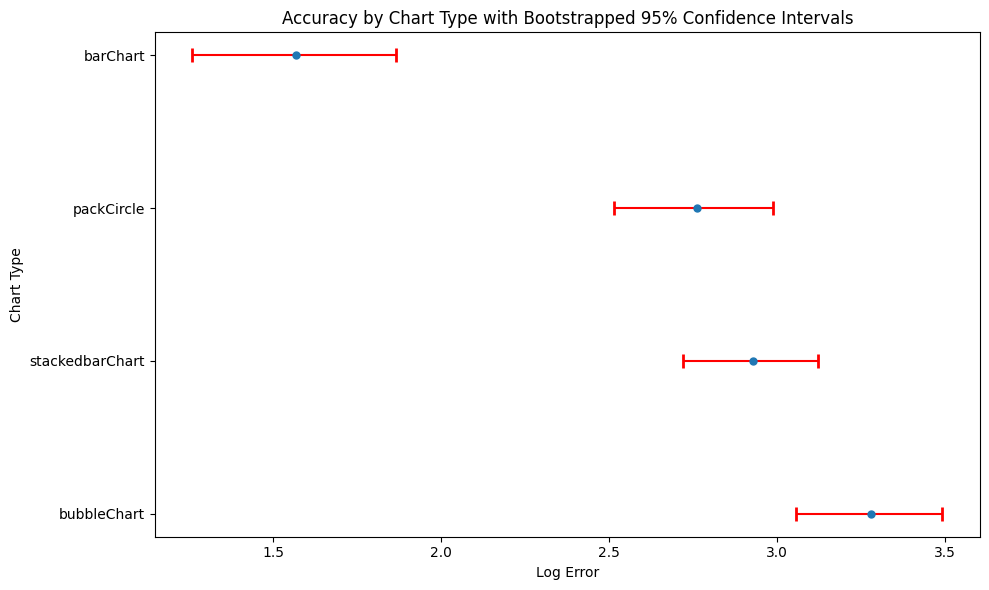

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

# Load the data
file_path = './cleaned_data.csv'
data = pd.read_csv(file_path)

# Define a function to apply bootstrap and return the 95% confidence interval for accuracy
def get_bootstrap_ci(series):
    ci = bootstrap((series,), np.mean, n_resamples=10000, method='percentile').confidence_interval
    return ci

# Apply this function to the accuracy data grouped by chart type
bootstrap_ci_df = data.groupby('chart_type')['accuracy'].apply(get_bootstrap_ci).apply(pd.Series)
bootstrap_ci_df.columns = ['lower', 'upper']

# Calculate mean accuracy for each chart type
mean_accuracy = data.groupby('chart_type')['accuracy'].mean()

# Merge the CI data with the mean accuracy data
accuracy_stats_with_ci = pd.DataFrame(mean_accuracy).merge(bootstrap_ci_df, left_index=True, right_index=True)

# Calculate error margins as the difference between mean and CI bounds
accuracy_stats_with_ci['error_lower'] = accuracy_stats_with_ci['accuracy'] - accuracy_stats_with_ci['lower']
accuracy_stats_with_ci['error_upper'] = accuracy_stats_with_ci['upper'] - accuracy_stats_with_ci['accuracy']

# Sorting the dataframe by mean accuracy in ascending order for plotting
accuracy_stats_sorted = accuracy_stats_with_ci.sort_values('accuracy', ascending=False)

# Plotting with the adjusted order
plt.figure(figsize=(10, 6))
plt.errorbar(accuracy_stats_sorted['accuracy'], range(len(accuracy_stats_sorted.index)), xerr=[accuracy_stats_sorted['error_lower'], accuracy_stats_sorted['error_upper']], fmt='o', ecolor='r', capsize=5, capthick=2, linestyle='None', markersize=5)

plt.yticks(range(len(accuracy_stats_sorted.index)), accuracy_stats_sorted.index)
plt.title('Accuracy by Chart Type with Bootstrapped 95% Confidence Intervals')
plt.xlabel('Log Error')
plt.ylabel('Chart Type')
plt.tight_layout()
plt.show()

In [8]:
accuracy_stats_sorted

,accuracy,lower,upper,error_lower,error_upper
chart_type,,,,,
bubbleChart,3.280420,3.055135,3.491872,0.225285,0.211452
stackedbarChart,2.927277,2.718692,3.121878,0.208585,0.194601
packCircle,2.760335,2.514642,2.985831,0.245694,0.225495
barChart,1.566337,1.258295,1.865351,0.308042,0.299014


# Accuracy by Participants

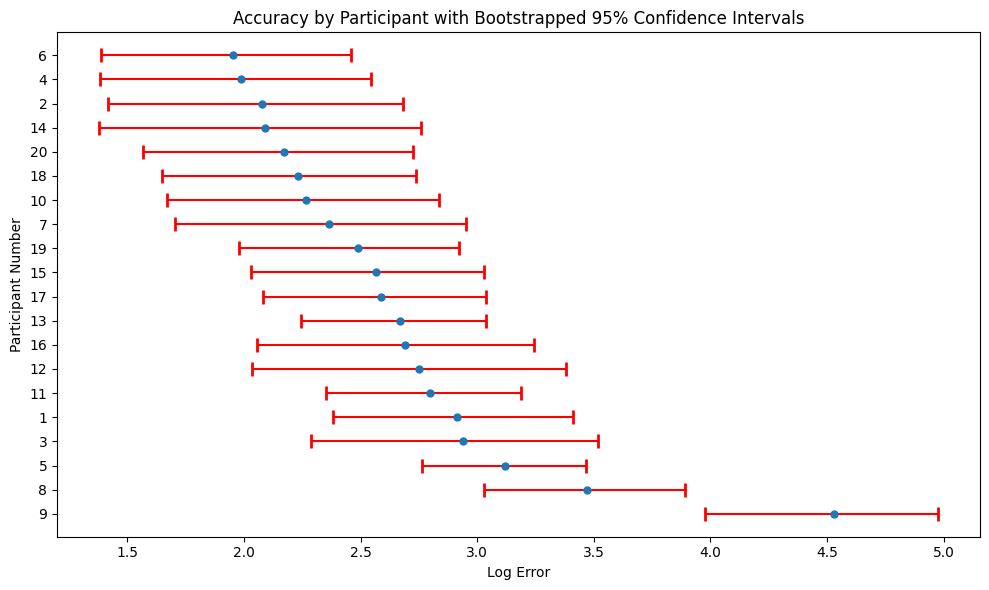

In [9]:
# Convert participantId into a categorical type and then into numeric codes from 1 to 20
data['participantId'] = data['participantId'].astype('category')
data['participantNum'] = data['participantId'].cat.codes + 1  # Add 1 to start numbering from 1 instead of 0

# Calculate mean accuracy and bootstrap confidence intervals for each participant
participant_mean_accuracy = data.groupby('participantNum')['accuracy'].mean()
participant_ci_df = data.groupby('participantNum')['accuracy'].apply(get_bootstrap_ci).apply(pd.Series)
participant_ci_df.columns = ['lower', 'upper']

# Merge the CI data with the mean accuracy data for participants
participant_stats_with_ci = pd.DataFrame(participant_mean_accuracy).merge(participant_ci_df, left_index=True, right_index=True)

# Calculate error margins as the difference between mean and CI bounds for participants
participant_stats_with_ci['error_lower'] = participant_stats_with_ci['accuracy'] - participant_stats_with_ci['lower']
participant_stats_with_ci['error_upper'] = participant_stats_with_ci['upper'] - participant_stats_with_ci['accuracy']

# Sorting the dataframe by mean accuracy in ascending order for plotting participants
participant_stats_sorted_by_mean = participant_stats_with_ci.sort_values('accuracy', ascending=False)

# Plotting with the adjusted order for participants sorted by mean accuracy
plt.figure(figsize=(10, 6))
plt.errorbar(participant_stats_sorted_by_mean['accuracy'], range(len(participant_stats_sorted_by_mean.index)), xerr=[participant_stats_sorted_by_mean['error_lower'], participant_stats_sorted_by_mean['error_upper']], fmt='o', ecolor='r', capsize=5, capthick=2, linestyle='None', markersize=5)

plt.yticks(range(len(participant_stats_sorted_by_mean.index)), participant_stats_sorted_by_mean.index)
plt.title('Accuracy by Participant with Bootstrapped 95% Confidence Intervals')
plt.xlabel('Log Error')
plt.ylabel('Participant Number')
plt.tight_layout()
plt.show()

In [10]:
participant_stats_sorted_by_mean

,accuracy,lower,upper,error_lower,error_upper
participantNum,,,,,
9,4.530015,3.975446,4.976335,0.554569,0.446320
8,3.473098,3.027313,3.891317,0.445785,0.418218
5,3.119264,2.765196,3.467513,0.354068,0.348249
3,2.940674,2.288631,3.516194,0.652043,0.575519
1,2.914303,2.382364,3.410329,0.531939,0.496027
11,2.799463,2.352375,3.188536,0.447088,0.389073
12,2.749558,2.036792,3.382717,0.712767,0.633159
16,2.688774,2.054856,3.244478,0.633918,0.555703
13,2.668546,2.246484,3.039998,0.422063,0.371452


# Proportion of Answer Based on Number Properties

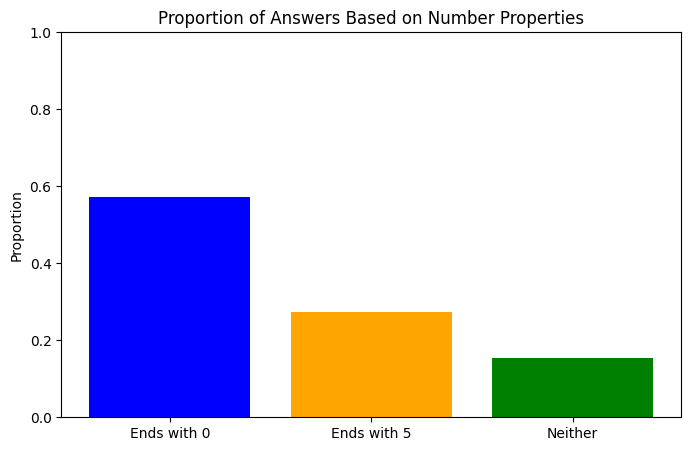

In [12]:
data['ends_with_0'] = data['answer'].astype(str).str.endswith('0')
data['ends_with_5'] = data['answer'].astype(str).str.endswith('5')
data['neither'] = ~(data['ends_with_5'] | data['ends_with_0'])

proportion_ends_with_0 = data['ends_with_0'].mean()
proportion_ends_with_5 = data['ends_with_5'].mean()
proportion_neither = data['neither'].mean()

proportion = [proportion_ends_with_0, proportion_ends_with_5, proportion_neither]
labels = ['Ends with 0', 'Ends with 5', 'Neither']

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, proportion, color=['blue', 'orange', 'green'])

# Adding titles and labels
plt.title('Proportion of Answers Based on Number Properties')
plt.ylabel('Proportion')
plt.ylim(0, 1)

# Show the plot
plt.show()

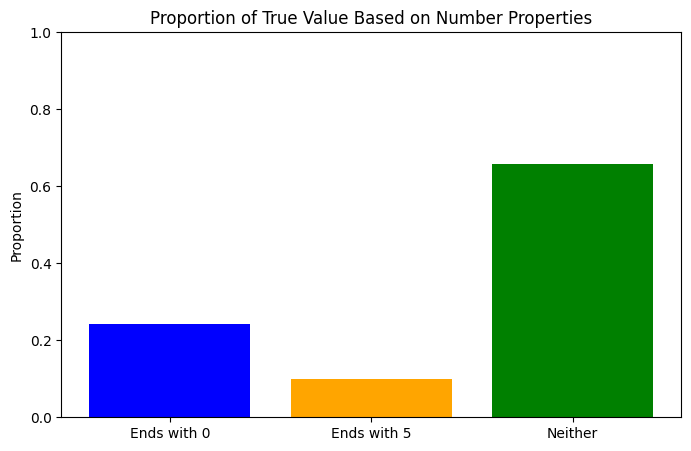

In [13]:
data['ends_with_0'] = data['true_value'].astype(str).str.endswith('0')
data['ends_with_5'] = data['true_value'].astype(str).str.endswith('5')
data['neither'] = ~(data['ends_with_5'] | data['ends_with_0'])

proportion_ends_with_0 = data['ends_with_0'].mean()
proportion_ends_with_5 = data['ends_with_5'].mean()
proportion_neither = data['neither'].mean()

proportion = [proportion_ends_with_0, proportion_ends_with_5, proportion_neither]
labels = ['Ends with 0', 'Ends with 5', 'Neither']

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, proportion, color=['blue', 'orange', 'green'])

# Adding titles and labels
plt.title('Proportion of True Value Based on Number Properties')
plt.ylabel('Proportion')
plt.ylim(0, 1)  # Assuming proportions are between 0 and 1

# Show the plot
plt.show()